In [1]:
"""
    Search a population for a set of 75 SNPs associated with drug response
"""
import libspiral
from biograph import *
import glob

In [55]:
# Load the cohort biograph, two references, and all the sample ID's
bg = new_graph("/mnt/cohort_125.gbwt")

ref37 = reference("/reference/human_g1k_v37")
ref38 = reference("/reference/homo_sapiens_GCA_000001405.19_GRCh38.p4")

In [56]:
# The biograph files are named for the sample they contain 
# [this involves loading 125 files and takes quite a while]
sample_names = [('.'.join(x.split('/')[2].split('.')[:-1])) for x in glob.glob("/mnt/*.bitmap")]
samples = {}
for sn in sample_names:
    samples[sn] = bg.load_readset("/mnt/" + sn + ".bitmap")

In [57]:
# Load SNPs that affect drug response and put into lists
with open("drug_response_snps", "rb") as f:
    data = f.read()
snps = [x.split('\t') for x in data.split('\n')[:-1]]

In [58]:
# Define a function to compute coverage of snp for a sample
def coverage(bg, ref, readset, snp, base, rlen = 100):
    seq = ref.make_range(snp[0], int(snp[2])-rlen, int(snp[2])+rlen+1, True).sequence
    seq[rlen] = base
    return bg.seq_coverage(seq, readset)[rlen]

In [59]:
# Compute single allele coverage for one individual -- NA12878
coverage(bg, ref38, samples['NA12878_S1'], snps[0], 'C')

24

In [62]:
# Now let's look at the allele breakdown for all SNPS for that single individual -- NA12878
for snp in snps:
    out = "%12s: " % (snp[3],)
    for allele in snp[4].split('/'):
        out += "%s=%2d " % (
            allele, 
            coverage(bg, ref38, samples['NA12878_S1'], snp, allele)
        )
    print out

      rs5219: C=24 T=16 
      rs6165: A= 0 C=36 G= 0 
      rs6166: A= 0 G= 0 
     rs16947: A=36 G= 0 
     rs16947: A= 0 G= 0 
     rs16947: A= 0 G= 0 
     rs16947: A=40 G= 0 
     rs37973: A=43 G= 0 
    rs713598: C=17 G=20 
   rs1057910: A=35 C= 0 
   rs1065852: C= 0 T= 0 
   rs1065852: C= 0 T= 0 
   rs1065852: C= 0 T= 0 
   rs1065852: C=42 T= 0 
   rs1135840: C= 0 G=38 
   rs1135840: C= 0 G=48 
   rs1135840: C=38 G= 0 
   rs1135840: C= 0 G=36 
   rs1726866: C= 0 T= 0 
   rs1799853: C=32 T=15 
   rs1799930: A= 0 G=38 
   rs1799931: A= 0 G=26 
   rs1800462: C=46 G= 0 
   rs1800888: C=25 T= 0 
   rs1801253: C=28 G= 0 
   rs1801279: A= 0 G=25 
   rs1801280: C=22 T=22 
   rs2279343: A=30 G=15 
   rs3745274: A= 0 G=26 T= 0 
   rs3892097: A= 0 G= 0 
   rs3892097: A= 0 G=41 
   rs3892097: A= 0 G= 0 
   rs3892097: A= 0 G= 0 
   rs4244285: A=30 C= 0 G=25 
   rs4986893: A= 0 G=37 
   rs5030865: A= 0 C=28 T= 0 
   rs5030865: A= 0 C= 0 T= 0 
   rs5030865: A=26 C= 0 T= 0 
   rs5030865: A= 0 C

In [63]:
# Now, for a single SNP, let's examine the allele breakdown for all individuals in the cohort
snp = snps[0]
for name, sample in samples.iteritems():
    if name[0].islower():
        continue # Skip references
    out = "%12s: " % (name,)
    for allele in snp[4].split('/'):
        out += "%s=%2d " % (
            allele, 
            coverage(bg, ref38, sample, snp, allele)
        )
    print out

  NA12879_S1: C=31 T= 0 
  NA12882_S1: C=14 T=13 
  SRR2098255: C=20 T= 0 
  SRR2098254: C=16 T=14 
  SRR2098257: C=13 T=15 
  SRR2098256: C=21 T= 0 
  SRR2098251: C=31 T= 0 
  SRR2098250: C=18 T= 0 
  SRR2098253: C=31 T= 0 
  SRR2098252: C=10 T=10 
  SRR2098259: C= 0 T=28 
  SRR2098258: C=27 T= 0 
  SRR2098268: C=24 T= 0 
  SRR2098269: C=25 T= 0 
  SRR2098260: C=20 T= 0 
  SRR2098261: C=29 T= 0 
  SRR2098262: C=25 T= 0 
  SRR2098263: C= 7 T=19 
  SRR2098264: C=16 T= 0 
  SRR2098265: C=27 T= 0 
  SRR2098266: C=15 T= 0 
  SRR2098267: C=28 T= 0 
  NA12881_S1: C=25 T= 0 
  SRR2098181: C=14 T=11 
  SRR2098180: C=18 T= 0 
  SRR2098183: C=28 T= 0 
  SRR2098182: C=30 T= 0 
  SRR2098177: C=22 T= 0 
  SRR2098178: C= 7 T=12 
  SRR2098179: C=20 T= 0 
  SRR2098221: C=14 T= 0 
  SRR2098222: C=21 T= 0 
  SRR2098279: C=16 T=11 
  SRR2098278: C=20 T= 0 
  SRR2098277: C=19 T= 0 
  SRR2098276: C=15 T= 0 
  SRR2098275: C=25 T= 0 
  SRR2098274: C=19 T= 0 
  SRR2098273: C=20 T= 0 
  SRR2098272: C=27 T= 0 


In [11]:
# All SNPS for all individuals (generating 6750 entries) -- observe long it takes to compute this -- 50x faster in C++
results = {}
for snp in snps:
    for name, sample in samples.iteritems():
        if name[0].islower():
            continue # Skip references
        out = ""
        for allele in snp[4].split('/'):
            out += "%s=%2d " % (
                allele, 
                coverage(bg, ref38, sample, snp, allele)
            )
        results[(snp[3], name)] = out

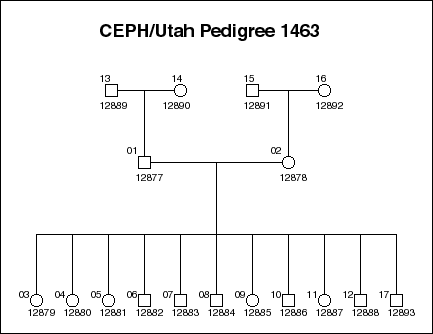

In [34]:
# Let's look at the CEPH 1463 Pedigree
# From the Cornell Institute for Medical Research, http://bit.ly/1Kc2q9m

from IPython.display import Image
Image(filename='ceph1463.png')

In [12]:
parents = ('NA12877_S1', 'NA12878_S1')
children = ('NA12879_S1', 'NA12880_S1', 'NA12881_S1', 'NA12882_S1', 
            'NA12883_S1', 'NA12884_S1', 'NA12885_S1', 'NA12886_S1', 
            'NA12887_S1', 'NA12888_S1', 'NA12893_S1')

In [13]:
# http://snpedia.com/index.php/Rs1801253
# For this SNP, lets see which alleles are present in each of the parents and children
#The father is homozygous with the "G" SNP / the mother is heterozygous with the "C" SNP / the children are all heterozygous
gene = 'rs1801253'

print gene + '\n'

for i in parents:
    print i + ': ' + results[(gene, i)]

print

for i in children:
    print i + ': ' + results[(gene, i)]

rs1801253

NA12877_S1: C= 0 G=24 
NA12878_S1: C=28 G= 0 

NA12879_S1: C=14 G=12 
NA12880_S1: C=16 G=13 
NA12881_S1: C=15 G=16 
NA12882_S1: C=18 G=19 
NA12883_S1: C=13 G=16 
NA12884_S1: C=16 G=14 
NA12885_S1: C= 6 G=11 
NA12886_S1: C=12 G=16 
NA12887_S1: C=17 G=17 
NA12888_S1: C=13 G=17 
NA12893_S1: C=15 G=17 


In [50]:
SV ="ACTTTGGGAGGCCGAGGTGGGTGGGTCACCTGAGGTCAGAAGTTTGAGACCTGTCTGGCCAATATGGTGAAACCCCATCTCTCCTAAATATACATTTAACTCAAAAAAAGTTAAAATTATAGTCAAACACTAACACTACCCTGTAGAATATAATTAATTACTGAAATAAGCACTATGAAAACATTGTCC"

In [64]:
# Compute the average coverage of a deletion breakpoint
out = []
for name, sample in samples.iteritems():
    if name[0].islower():
        continue # Skip references
    cov_map = bg.seq_coverage(libspiral.sequence(SV), sample)
    out += ["%12s: %d" % (name, cov_map[100])]
for l in sorted(out):
    print l

  NA12877_S1: 15
  NA12878_S1: 22
  NA12879_S1: 17
  NA12880_S1: 34
  NA12881_S1: 20
  NA12882_S1: 23
  NA12883_S1: 15
  NA12884_S1: 0
  NA12885_S1: 35
  NA12886_S1: 19
  NA12887_S1: 37
  NA12888_S1: 23
  NA12889_S1: 18
  NA12890_S1: 14
  NA12891_S1: 29
  NA12892_S1: 0
  NA12893_S1: 0
  SRR2098177: 0
  SRR2098178: 0
  SRR2098179: 9
  SRR2098180: 8
  SRR2098181: 0
  SRR2098182: 26
  SRR2098183: 31
  SRR2098184: 27
  SRR2098185: 12
  SRR2098186: 9
  SRR2098187: 26
  SRR2098188: 37
  SRR2098189: 15
  SRR2098190: 0
  SRR2098191: 29
  SRR2098192: 17
  SRR2098193: 25
  SRR2098194: 15
  SRR2098195: 14
  SRR2098196: 24
  SRR2098197: 28
  SRR2098198: 0
  SRR2098199: 14
  SRR2098200: 14
  SRR2098201: 17
  SRR2098202: 27
  SRR2098203: 15
  SRR2098204: 16
  SRR2098205: 13
  SRR2098206: 14
  SRR2098207: 11
  SRR2098208: 25
  SRR2098209: 32
  SRR2098210: 30
  SRR2098211: 30
  SRR2098212: 0
  SRR2098213: 0
  SRR2098214: 10
  SRR2098215: 16
  SRR2098216: 19
  SRR2098217: 21
  SRR2098218: 31
  SRR20982

In [32]:
bg.seq_coverage(libspiral.sequence(SV), samples['NA12878_S1'])[100]

22